In [1]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy
from distribuciones import espirales_anidadas, paralelo, diagonal
from random import sample
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Ejercicio 1

In [15]:
neuronas_capa_int = [2,10,20,40,60,80]
lrate = 0.1
pmom  = 0.9
ndata = 600
ntest = 2000
nevaluaciones = 1000
nepocas = 20

In [16]:
df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
y0 = df['clases']
x0 = df.drop(['clases'],axis = 1)

mask_validation = sample(list(np.arange(ndata)),120)
mask_train = np.delete(np.arange(ndata),mask_validation)

y_validation = y0.values[mask_validation]
x_validation = x0.values[mask_validation]

y_train = y0.values[mask_train]
x_train = x0.values[mask_train]

df_test = espirales_anidadas(ntest).drop(['r','tita'],axis=1)
y_test = df['clases']
x_test = df.drop(['clases'],axis = 1)

x_test = x_test.values
y_test = y_test.values

In [10]:
def entrenar_red(evaluaciones,red,x_train,y_train,x_val,y_val,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_val)
        error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    error_test = sk.metrics.zero_one_loss(pred_test,y_test)

    pred_train = mejor_red.predict(x_train)
    error_train = sk.metrics.zero_one_loss(pred_train,y_train)

    
    return red, error_train, min_error, error_test

In [9]:
%%time

errores_train = []
errores_valid = []
errores_test = []

redes = []

for neuronas in neuronas_capa_int:
    
    print(neuronas)
    clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 
    
    red, error_train, error_val, error_test = entrenar_red(evaluaciones = nevaluaciones, red = clasif, 
                                                       x_train = x_train,y_train = y_train,
                                                       x_val = x_validation,y_val = y_validation,
                                                       x_test = x_test,y_test = y_test)
    
    errores_train.append(error_train)
    errores_valid.append(error_val)
    errores_test.append(error_test)
    
    redes.append(red)

NameError: name 'neuronas_capa_int' is not defined

Text(0, 0.5, 'MSE')

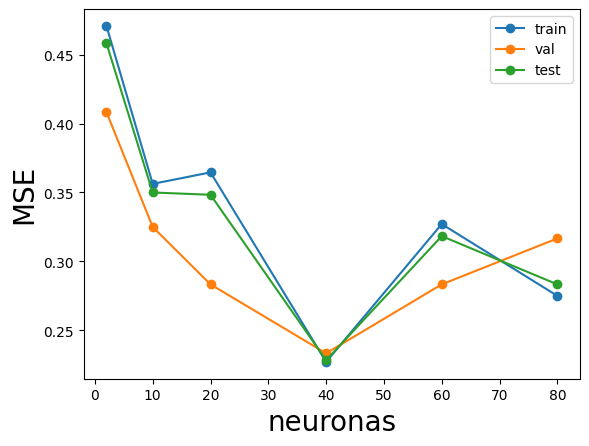

In [19]:
plt.plot(neuronas_capa_int,errores_train,label='train',marker='o')
plt.plot(neuronas_capa_int,errores_valid,label='val',marker='o')
plt.plot(neuronas_capa_int,errores_test,label='test',marker='o')
plt.legend()
plt.xlabel('neuronas',size=20)
plt.ylabel('MSE',size=20)

Cuanto mayor es el numero de neuronas mejor funciona la red (hasta 40 neuronas), y los errores son similares para los diferentes conjuntos (entrenamiento y test) por lo cual no creo que haya un sobreajuste. Me resulta un poco raro que  el conjunto de entrenamiento tenga el error mas grande, luego el de test y luego el de validacion. En el caso de el de validacion, este puede ser chico porque uno esta eligiendo siempre la red con el error mas chico en el conjunto de validación. 

In [20]:
red1 = redes[0]
red2 = redes[1]
red3 = redes[2]
red4 = redes[3]

In [21]:
pred1 = red1.predict(x_test)
pred2 = red2.predict(x_test)
pred3 = red3.predict(x_test)
pred4 = red4.predict(x_test)

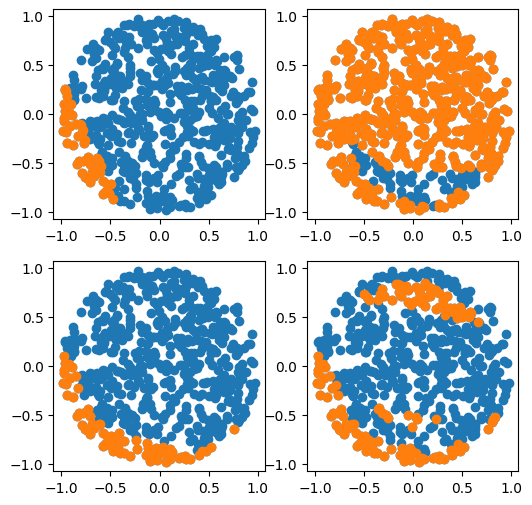

In [22]:
plt.figure(figsize=(6,6))

plt.subplot(221)
c0, = np.where(pred1==0)
plt.plot(x_test[:,0],x_test[:,1],ls='none',marker='o')
plt.plot(x_test[c0,0],x_test[c0,1],ls='none',marker='o')

plt.subplot(222)
c0, = np.where(pred2==0)
plt.plot(x_test[:,0],x_test[:,1],ls='none',marker='o')
plt.plot(x_test[c0,0],x_test[c0,1],ls='none',marker='o')

plt.subplot(223)
c0, = np.where(pred3==0)
plt.plot(x_test[:,0],x_test[:,1],ls='none',marker='o')
plt.plot(x_test[c0,0],x_test[c0,1],ls='none',marker='o')

plt.subplot(224)
c0, = np.where(pred4==0)
plt.plot(x_test[:,0],x_test[:,1],ls='none',marker='o')
plt.plot(x_test[c0,0],x_test[c0,1],ls='none',marker='o')

Los resultados son malos en todos los casos. Las espirales no fueron recuperadas en ninguna red

# Ejercicio 2

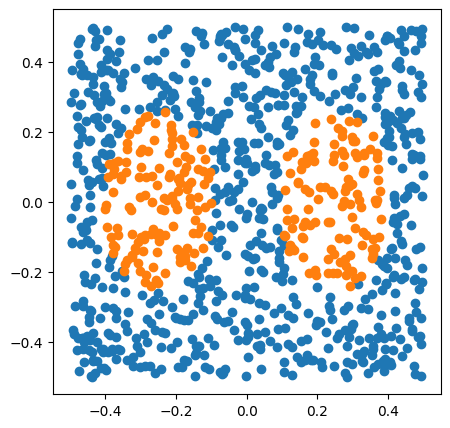

In [3]:
df = pd.read_csv('dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]

c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.figure(figsize=(5,5))
plt.plot(x[c0],y[c0],ls='none',marker='o')
plt.plot(x[c1],y[c1],ls='none',marker='o')

In [4]:
neuronas = 6
lrate = 0.1   # 0.1, 0.01, 0.001
pmom  = 0.9   # 0, 0.5, 0.9
ndata = 500
ntrain = 400
nvalid = 100
ntest = 2000
nevaluaciones = 300
nepocas = 50

In [5]:
# selecciono 500 datos para trabajar

seleccion = sample(list(np.arange(len(x))),ndata)
xdata = x[seleccion]
ydata = y[seleccion]

# separo en train y validation

train_mask = sample(list(np.arange(ndata)),ntrain)
valid_mask = np.delete(np.arange(ndata),train_mask)

In [6]:
r_train = df.iloc[train_mask,:2]
c_train = df.iloc[train_mask,2]

r_valid = df.iloc[valid_mask,:2]
c_valid = df.iloc[valid_mask,2]

In [7]:
df_test = pd.read_csv('dos_elipses.test')
df_test.columns = ['x','y','clase']

r_test = df_test.iloc[:,:2]
c_test = df_test.iloc[:,2]

In [11]:
%%time
epocas = [5,12,20,28,35,42,50]

neuronas = 6
lrate = 0.1   # 0.1, 0.01, 0.001
pmom  = 0.9 

error_train_mean = []
error_valid_mean = []
error_tests_mean = []

for i in epocas:
    print(i)
    clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter= i )
    
    error_train_list = []
    error_valid_list = []
    error_tests_list = []
    
    for j in range(10):
        red, error_train, error_val, error_test = entrenar_red(evaluaciones = 10, red = clasif,  
                                                       x_train=r_train,y_train=c_train,
                                                       x_val=r_valid,y_val=c_valid,
                                                       x_test=r_test,y_test=c_test)
        error_train_list.append(error_train)
        error_valid_list.append(error_val)
        error_tests_list.append(error_test)
        
    
    error_train_mean.append(np.mean(error_train_list))
    error_valid_mean.append(np.mean(error_valid_list))
    error_tests_mean.append(np.mean(error_tests_list))

5
12
20
28
35
42
50
CPU times: user 2min 37s, sys: 36.5 s, total: 3min 13s
Wall time: 2min 10s


Text(0, 0.5, 'MSE')

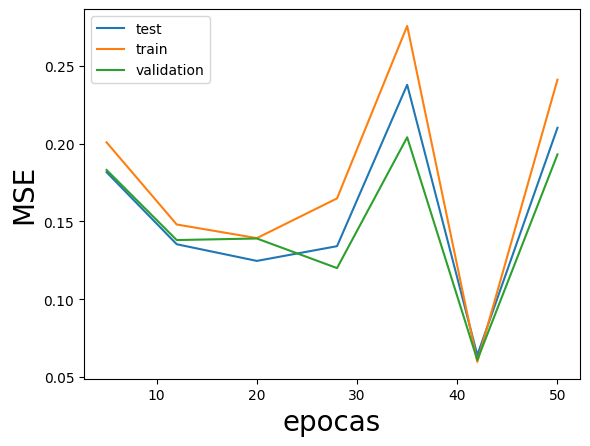

In [12]:
plt.plot(epocas,error_tests_mean,label='test')
plt.plot(epocas,error_train_mean,label='train')
plt.plot(epocas,error_valid_mean,label='validation')
plt.legend()
plt.xlabel('epocas',size=20)
plt.ylabel('MSE',size=20)

In [36]:
lrate_list = [0.001, 0.01, 0.1]
pmom_list  = [0,0.5,0.9]
epocas_list = [10,20,30,40,50]

In [37]:
%%time


error_train_mean = np.zeros([3,3,5])
error_valid_mean = np.zeros([3,3,5])
error_tests_mean = np.zeros([3,3,5])

ilr = 0; ipm = 0; ine = 0
for lr in lrate_list:
    ipm = 0
    print('learning rate',lr)
    for pm in pmom_list:
        ine = 0
        #print('momentum',pm)
        for ne in epocas_list:
            #print('epocas',ne)
            clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                           batch_size=1, learning_rate='constant', learning_rate_init=lr,momentum=pm,
                           nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter= ne )
        
            error_train_list = []
            error_valid_list = []
            error_tests_list = []
            
            for j in range(10):
                
                red, error_train, error_val, error_test = entrenar_red(evaluaciones = 10, red = clasif,  
                                                               x_train=r_train,y_train=c_train,
                                                               x_val=r_valid,y_val=c_valid,
                                                               x_test=r_test,y_test=c_test)
                error_train_list.append(error_train)
                error_valid_list.append(error_val)
                error_tests_list.append(error_test)
                
            
            error_train_mean[ilr,ipm,ine] = np.mean(error_train_list)
            error_valid_mean[ilr,ipm,ine] = np.mean(error_valid_list)
            error_tests_mean[ilr,ipm,ine] = np.mean(error_tests_list)
            
            ine = ine + 1
        
        ipm = ipm + 1
    ilr = ilr + 1

learning rate 0.001
momentum 0
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.5
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.9
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
learning rate 0.01
momentum 0
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.5
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.9
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
learning rate 0.1
momentum 0
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.5
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
momentum 0.9
epocas 10
epocas 20
epocas 30
epocas 40
epocas 50
CPU times: user 20min 36s, sys: 4min 6s, total: 24min 43s
Wall time: 17min 42s


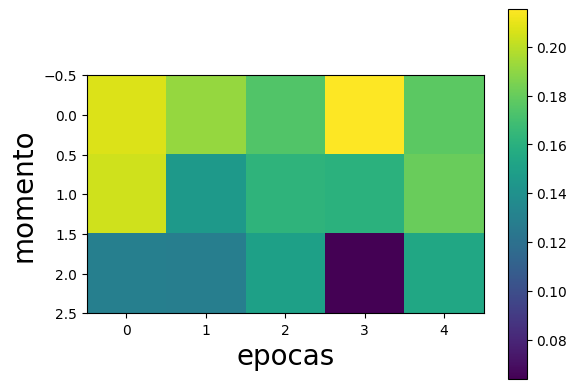

In [49]:
plt.imshow(error_train_mean[2,:,:])
plt.xlabel('epocas',size=20)
plt.ylabel('momento',size=20)
plt.colorbar()

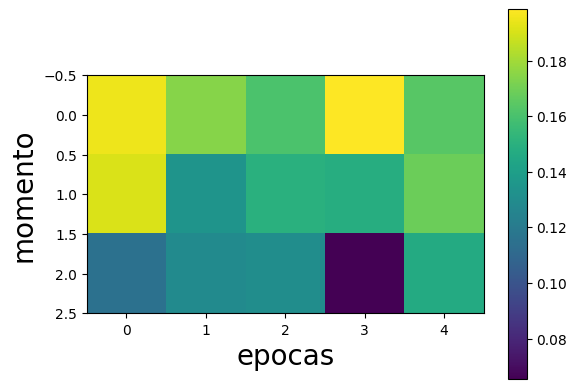

In [57]:
plt.imshow(error_tests_mean[2,:,:])
plt.xlabel('epocas',size=20)
plt.ylabel('momento',size=20)
plt.colorbar()

Lo corri varias veces y siempre encuentro que las mejores redes son aquellas con un learning rate alto (0.1). En general, creo que las mejores redes son aquellas entrenadas con 40 epocas, y el momento me ha variado bastante. En este caso, lo mejor ha resultado un momento de 0.9

Text(0, 0.5, 'MSE')

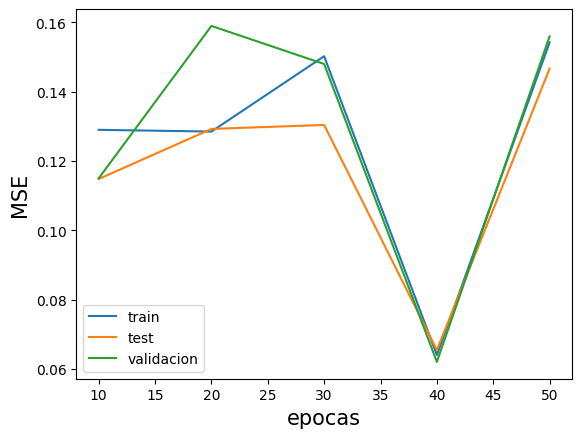

In [58]:
plt.plot(epocas_list,error_train_mean[2,2,:],label='train')
plt.plot(epocas_list,error_tests_mean[2,2,:],label='test')
plt.plot(epocas_list,error_valid_mean[2,2,:],label='validacion')

plt.legend()
plt.xlabel('epocas',size=15)
plt.ylabel('MSE',size=15)

En general, la red con 40 epocas, un learning rate de 0.1 y un momento de 0.9 anda bien. De todas maneras, he encontrado muchos resultados diferentes para las diferentes corridas lo cual sugiere que es un problema con muchos minimos locales diferentes. 

# Ejercicio 3

In [64]:
t1 = np.loadtxt('ikeda.data')
t2 = np.loadtxt('ikeda.test')

df_data = pd.DataFrame(t1)
df_test = pd.DataFrame(t2)

x_test = df_test.iloc[:ntest,:5]
y_test = df_test.iloc[:ntest,5]

In [65]:
from sklearn.metrics import mean_squared_error

def entrenar_red_3(evaluaciones,red,x_train,y_train,x_val,y_val,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_val)
        #error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        error_val = (mean_squared_error(y_pred, y_val))
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    #error_test = sk.metrics.zero_one_loss(pred_test,y_test)
    error_test = (mean_squared_error(pred_test,y_test))
    pred_train = mejor_red.predict(x_train)
    #error_train = sk.metrics.zero_one_loss(pred_train,y_train)
    error_train = (mean_squared_error(pred_train,y_train))
    
    return red, error_train, min_error, error_test

In [66]:
lrate = 0.01
pmom  = 0.9
ntest = 2000
evaluaciones = 400
epocas = 50
neuronas = 30

In [67]:
%%time

vsize = [10,20,30,40,50]
regr = MLPRegressor(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                    batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                    nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)

etrain = []
etests = []
evalid = []

for i in vsize:
    print(i)
    train_size = 100-i
    valid_size = i
    
    x_train = df_data.iloc[:train_size,:5]
    y_train = df_data.iloc[:train_size,5]

    x_valid = df_data.iloc[train_size:100,:5]
    y_valid = df_data.iloc[train_size:100,5]
    
    red, error_train, error_val, error_test = entrenar_red_3(evaluaciones = 400, red = regr,  
                                                       x_train=x_train,y_train=y_train,
                                                       x_val=x_valid,y_val=y_valid,
                                                       x_test=x_test,y_test=y_test)
    etrain.append(error_train)
    evalid.append(error_val)
    etests.append(error_test)

10
20
30
40
50
CPU times: user 31.5 s, sys: 2.14 s, total: 33.6 s
Wall time: 29.9 s


Text(0.5, 0, 'porcentaje validation-set')

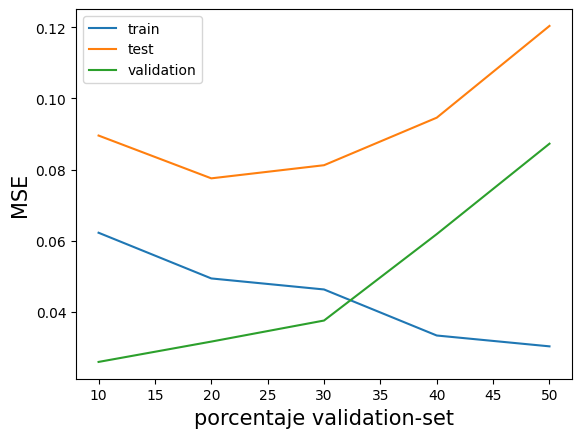

In [68]:
plt.plot(vsize,etrain,label='train')
plt.plot(vsize,etests,label='test')
plt.plot(vsize,evalid,label='validation')
plt.legend()
plt.ylabel('MSE',size=15)
plt.xlabel('porcentaje validation-set',size=15)

Para este ejercicio he tenido bastante consistencia en los resultados en las diferentes corridas del codigo. Encuentro que los mejores resultados se obtienen cuando uno entrena con el 80% de los datos y valida con el 20%. Esto se ve en que para datasets de validación mayores al 20% el error de test aumenta.
Puedo ver a medida que aumento el tamaño de los dataset de validación, empiezo a tener errores mas grandes en el error de validacion y errores muy chicos en el error de entrenamiento, lo cual me esta indicando que tengo sobreajuste. En este caso, al aumentar el tamaño del set de validacion estoy disminuyendo el tamaño del set de entrenamiento y por lo tanto es mas facil lograr un sobreajuste de este. 

# Ejercicio 4

In [69]:
data = pd.read_csv('ssp.data',header=None)
test = pd.read_csv('ssp.test',header=None)

x_train = data.iloc[:,:12]
y_train = data.iloc[:,12]

x_test = test.iloc[:,:12]
y_test = test.iloc[:,12]

In [70]:
lrate = 0.05
pmom  = 0.3
ntest = 2000
evaluaciones = 4000
epocas = 20
neuronas = 6

In [71]:
def entrenar_red_4(evaluaciones,red,x_train,y_train,x_test,y_test):
    errores = []
    min_error = 9999999
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        #y_pred = red.predict(x_val)
        #error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        #error_val = np.sqrt(mean_squared_error(y_pred, y_val))
        suma_pesos = np.sum(abs(regr.coefs_[0]))
        #errores.append(error_valid)
        if suma_pesos < min_error:
            min_error = suma_pesos
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    #error_test = sk.metrics.zero_one_loss(pred_test,y_test)
    error_test = (mean_squared_error(pred_test,y_test))
    pred_train = mejor_red.predict(x_train)
    #error_train = sk.metrics.zero_one_loss(pred_train,y_train)
    error_train = (mean_squared_error(pred_train,y_train))
    
    return red, error_train, error_test, min_error

In [73]:
%%time 

gammas = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]

etrain = []
etests = []
spesos = []

for gamma in gammas:
    print(gamma)
    regr = MLPRegressor(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', 
                    alpha=gamma, batch_size=1, learning_rate='constant', 
                    learning_rate_init=lrate,momentum=pmom,nesterovs_momentum=False,
                    tol=0.0,warm_start=True,max_iter=epocas)
    
    red, error_train, error_test, suma_pesos = entrenar_red_4(evaluaciones,regr,x_train,y_train,
                                                            x_test,y_test)
    
    etrain.append(error_train)
    etests.append(error_test)
    spesos.append(suma_pesos)

1e-06
1e-05
0.0001
0.001
0.01
0.1
CPU times: user 12min 31s, sys: 318 ms, total: 12min 32s
Wall time: 12min 31s


Text(0.5, 0, '$\\gamma$')

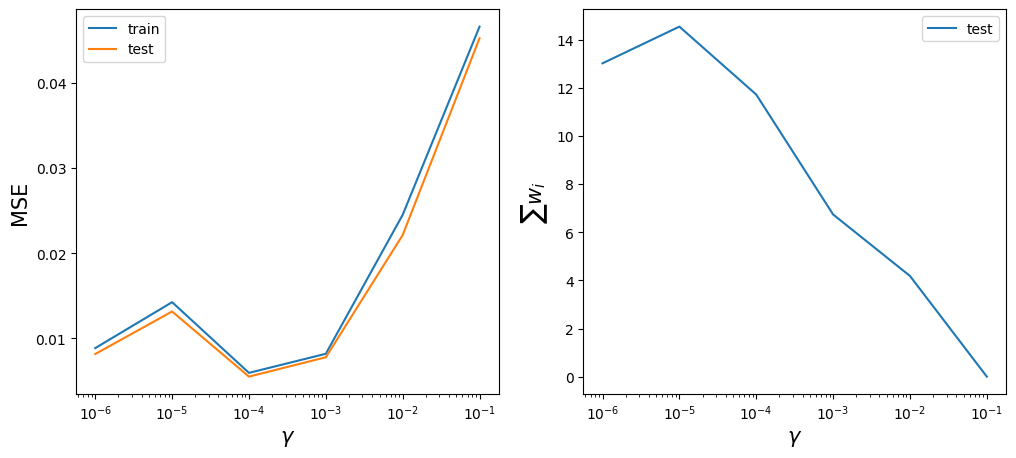

In [74]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(gammas,etrain,label='train')
plt.plot(gammas,etests,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('MSE',size=15)
plt.xlabel('$\\gamma$',size=15)

plt.subplot(122)
plt.plot(gammas,spesos,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('$ \\sum w_i $',size=15)
plt.xlabel('$\\gamma$',size=15)

Para este problema me llama de nuevo la atencion que los errores de train sean mayores a los de test. Quizas necesite un conjunto de test mayor para tener resultados mas confiables ya que en este caso, el conjunto de test es la mitad del conjunto de entrenamiento. 

Los mejores resultados se obtienen para gamma=1e-4 y he obtenido eso consistentenmente en varias corridas. Para valores de gamma mas altos, veo que la sumatoria de los pesos se hace muy chica. Esto quizas genere poca capacidad de generalizacion de la red ya que los coeficientes se reducen (estoy penalizando demasiado), y por eso es que veo que el error aumenta. 

# Ejercicio 5

In [77]:
C = 0.78
n_train = 250
n_test  = 10000
D_values = [2,4,8,16,32]
trainingsets = 20

In [78]:
neuronas = 6
pmom = 0.5
lrate = .05
epocas = 30

In [79]:
%%time
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        
        clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
        #clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clasif.fit(X, y)
        
        prediccion_training = clasif.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clasif.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_d[i] = np.mean(error_training[i,:])

error_mean_test_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_d[i] = np.mean(error_test[i,:])

CPU times: user 3min 2s, sys: 54.3 s, total: 3min 57s
Wall time: 2min 24s


In [80]:
%%time
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testpara = paralelo(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = paralelo(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
        #clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clasif.fit(X, y)
        
        prediccion_training = clasif.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testpara.drop(['clases'],axis = 1).values
        prediccion_test = clasif.predict(test)
        correctos, = np.where(prediccion_test == testpara['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_p[i] = np.mean(error_training[i,:])

error_mean_test_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_p[i] = np.mean(error_test[i,:])

CPU times: user 2min 57s, sys: 55.4 s, total: 3min 52s
Wall time: 2min 17s


In [84]:
diag = np.loadtxt('ej4_diagonal.txt')
para = np.loadtxt('ej4_paralelo.txt')

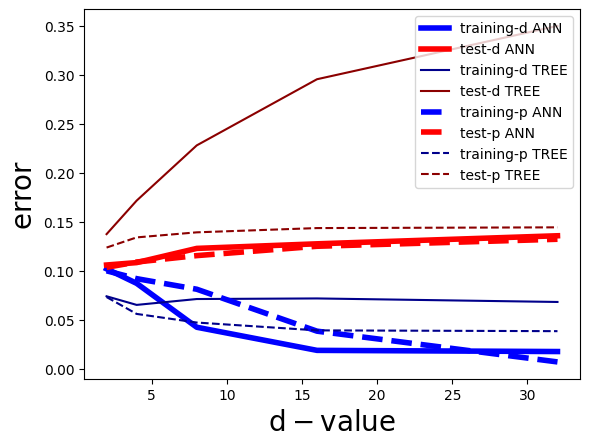

In [91]:
plt.plot(D_values,error_mean_training_d,label='training-d ANN',color='blue',lw=4)
plt.plot(D_values,error_mean_test_d,label='test-d ANN',color='red',lw=4)
plt.plot(D_values,diag[:,1],label='training-d TREE',color='darkblue')
plt.plot(D_values,diag[:,2],label='test-d TREE',color='darkred')

plt.plot(D_values,error_mean_training_p,label='training-p ANN',ls='--',color='blue',lw=4)
plt.plot(D_values,error_mean_test_p,label='test-p ANN',ls='--',color='red',lw=4)
plt.plot(D_values,para[:,1],label='training-p TREE',color='darkblue',ls='--')
plt.plot(D_values,para[:,2],label='test-p TREE',color='darkred',ls='--')

plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()

Para arboles, tengo que hacer cortes paralelos a los ejes para ir tomando decisiones. Al aumentar la cantidad de dimensiones, la "densidad" de puntos cae exponencialmente. Para el caso diagonal, esto lo perjudica mucho porque uno necesita hacer cortes diagonales, entonces tiene que aproximar diagonales con cortes paralelos a los ejes y eso al tener pocos puntos se vuelve cada vez mas dificil. Lo que vemos, es que en el caso de las redes neuronales este problema se soluciona mucho mejor, y que todo converge. No existen mucha diferenciaa en separar los problemas paralelo y diagonal (en comparacion a los tree que el diagonal se les hacia muy dificil). 